In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
model = keras.models.load_model('../models/fruitNet/fruitnet_model.h5')

In [23]:
import pathlib
test_dir = "../data/fruitNet/"

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    shuffle=True,
    seed=123,
    image_size=(224, 224),
)

Found 15 files belonging to 1 classes.


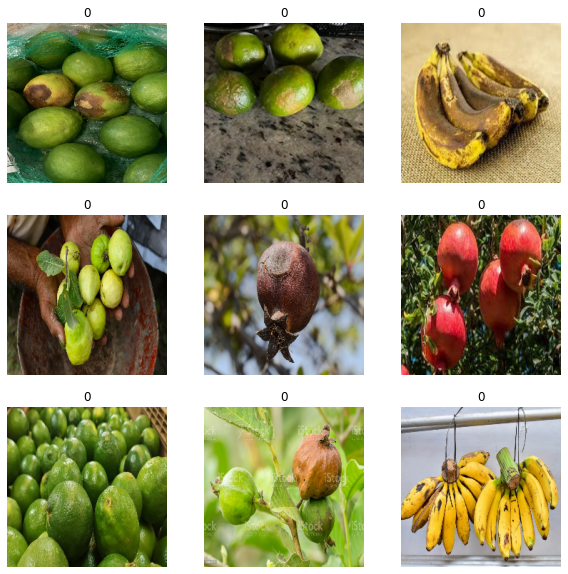

In [24]:

from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [4]:
preprocessing_input = tf.keras.applications.inception_resnet_v2.preprocess_input

In [5]:
testGen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function= preprocessing_input)

In [28]:
test_ds =testGen.flow_from_directory(test_dir, 
                                        class_mode='categorical', 
                                        batch_size=32,
                                        target_size=(256, 256),
                                        )

Found 15 images belonging to 1 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

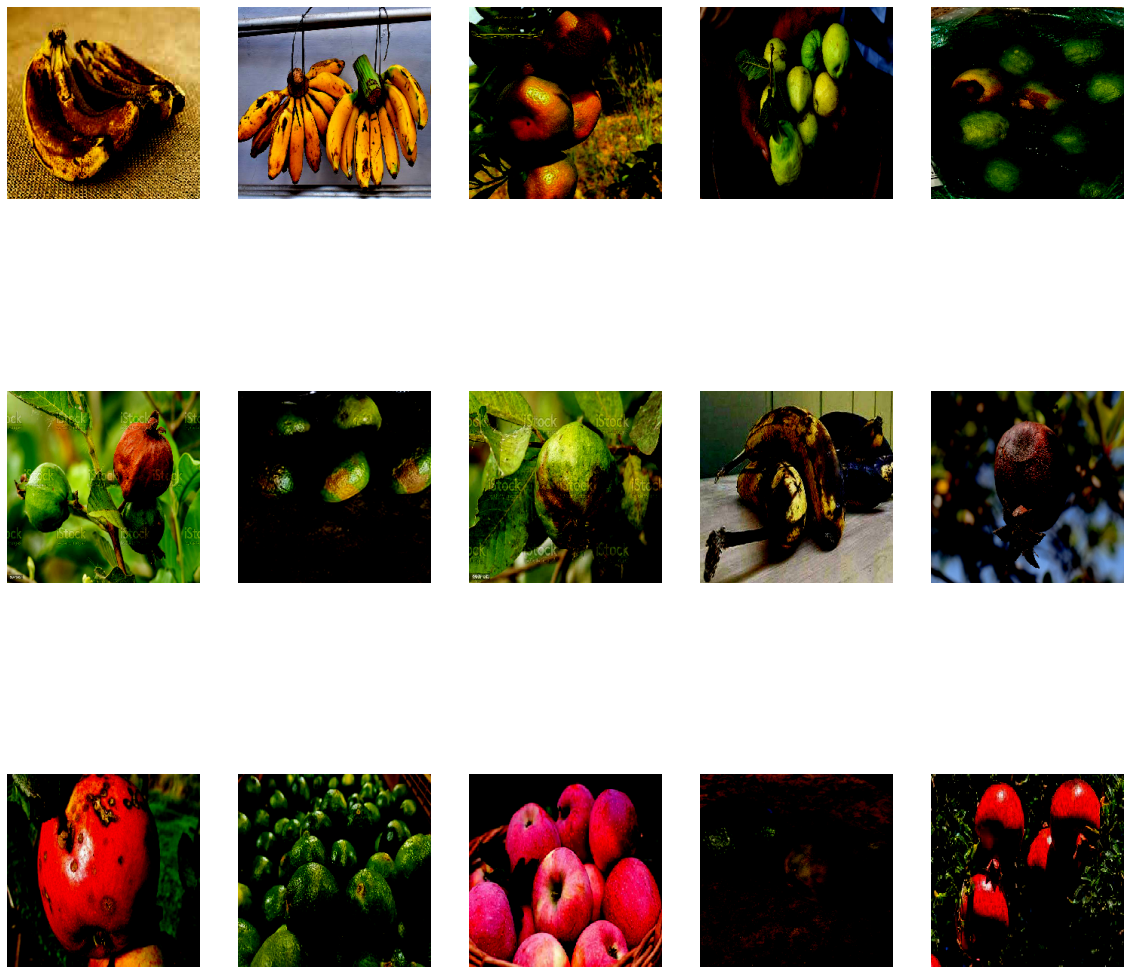

In [29]:
# visualization test_ds
from matplotlib import pyplot as plt

fit, ax = plt.subplots(3, 5, figsize=(20, 20))
ax = ax.flatten()

for i in range(15):
    img = test_ds[0][0][i]
    ax[i].imshow(img)
    ax[i].axis('off')

In [8]:
label_file = open("../models/fruitNet/labels.txt", "r")

labels = label_file.read().splitlines()

In [9]:
sorted_labels = sorted(labels)
sorted_labels

['Apple_Bad',
 'Apple_Good',
 'Apple_mixed',
 'Banana_Bad',
 'Banana_Good',
 'Banana_mixed',
 'Guava_Bad',
 'Guava_Good',
 'Guava_mixed',
 'Lemon_mixed',
 'Lime_Bad',
 'Lime_Good',
 'Orange_Bad',
 'Orange_Good',
 'Orange_mixed',
 'Pomegranate_Bad',
 'Pomegranate_Good',
 'Pomegranate_mixed']

In [30]:
loss, acc = model.evaluate(test_ds)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

1/1 [==============================] - 4s 4s/step - loss: 419.9065 - accuracy: 0.0000e+00
Restored model, accuracy:  0.00%


In [11]:
predictions = model.predict(test_ds)
predictions

1/1 [==============================] - 9s 9s/step


array([[1.55398890e-03, 1.49558140e-02, 5.53807768e-04, 5.37344036e-09,
        2.31886030e-08, 9.53779163e-05, 1.30478768e-16, 3.93688110e-10,
        1.05523254e-14, 1.10024316e-12, 3.20830127e-14, 2.17191043e-17,
        1.41517182e-06, 9.78954017e-01, 9.69642770e-07, 1.88616979e-15,
        3.88352177e-03, 1.03473985e-06],
       [1.50689475e-10, 2.64562664e-06, 2.74812660e-17, 7.47125343e-13,
        3.30554523e-15, 1.03280279e-13, 9.14561450e-01, 8.54359716e-02,
        9.12832476e-09, 5.49921872e-19, 3.51227456e-13, 8.27504834e-25,
        3.56364179e-12, 1.63258900e-18, 1.87327160e-19, 8.10371244e-15,
        1.09813363e-22, 9.30665291e-18],
       [1.20452598e-13, 2.44092057e-03, 1.57194311e-08, 1.03487674e-09,
        8.52044835e-09, 9.74969225e-07, 5.49448043e-10, 9.97426808e-01,
        2.58388411e-07, 4.76534400e-14, 2.71485803e-11, 2.85952512e-19,
        1.26401801e-05, 5.42393482e-14, 2.71188014e-07, 5.09342811e-11,
        2.46420375e-12, 1.18018994e-04],
       [2.200

In [12]:
pred = np.argmax(predictions, axis=1)
pred

array([13,  6,  7,  7, 16,  3, 13,  4, 13, 13, 15, 13,  3, 15,  1],
      dtype=int64)

In [14]:
for i in pred:
    print(sorted_labels[i])
    

Orange_Good
Guava_Bad
Guava_Good
Guava_Good
Pomegranate_Good
Banana_Bad
Orange_Good
Banana_Good
Orange_Good
Orange_Good
Pomegranate_Bad
Orange_Good
Banana_Bad
Pomegranate_Bad
Apple_Good


1/1 [==============================] - 0s 376ms/step
[13]
prediction: Orange_Good


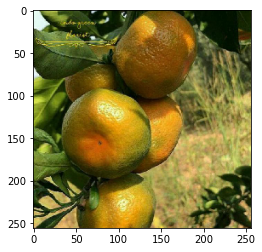

In [21]:
# prediction one image

image_path = "../data/fruitNet/tests/1.jpg"

img = keras.preprocessing.image.load_img(image_path, target_size=(256, 256))

img_arr = np.expand_dims(img, 0)
img_arr = tf.keras.applications.inception_resnet_v2.preprocess_input(img_arr)
pred = model.predict(img_arr)
# score = tf.nn.softmax(pred[0])
pred = np.argmax(pred, axis=1)
print(pred)
print(f"prediction: {sorted_labels[pred[0]]}")
plt.imshow(img)

1/1 [==============================] - 0s 148ms/step


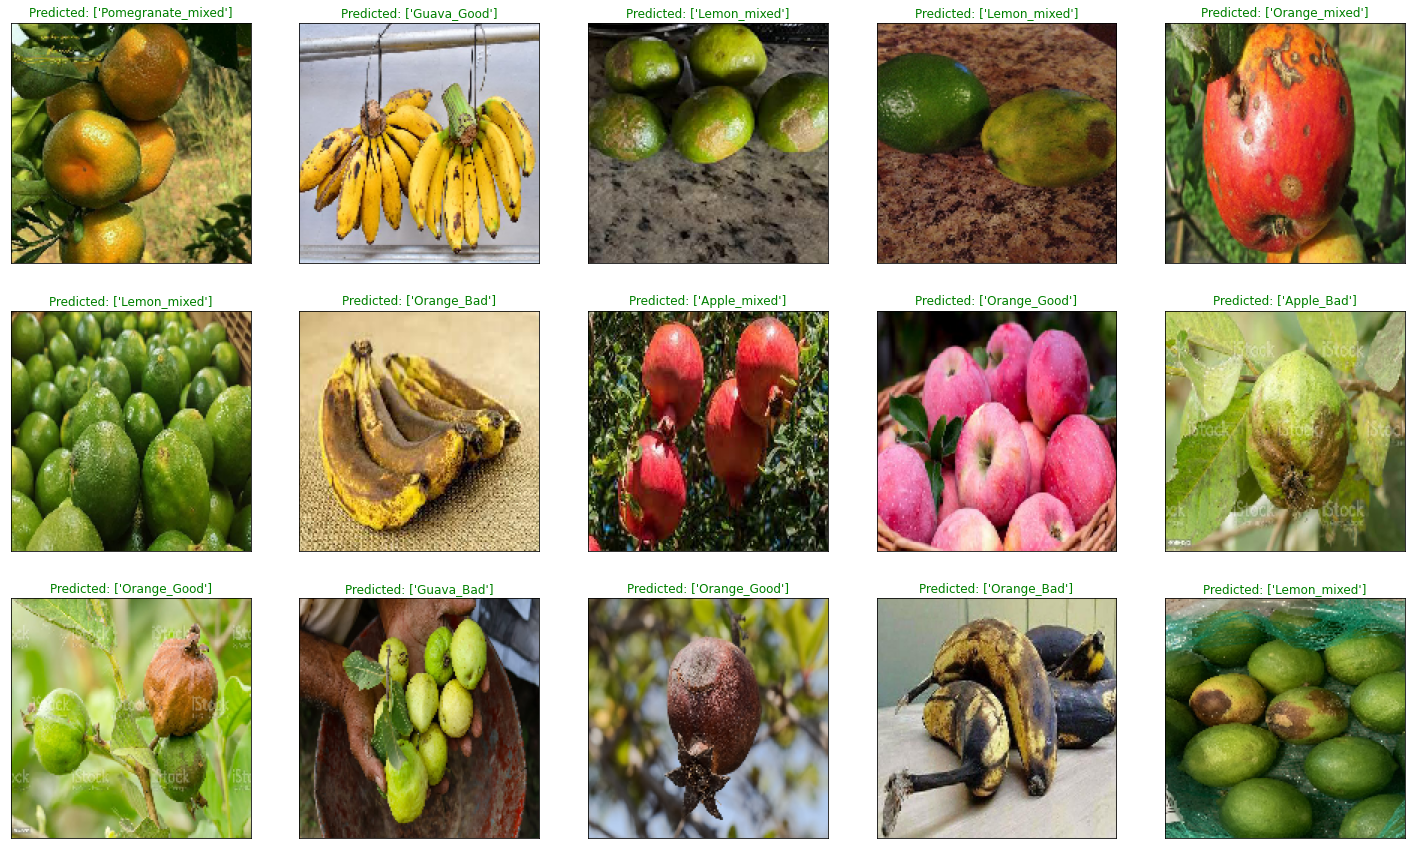

In [22]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

random_index = np.random.randint(1, 10,11)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = load_img(test_dir+"tests/"+str(i+1)+'.jpg', target_size=(160, 160))
    ax.imshow(img)
    img = image.img_to_array(img)
    img_arr = np.expand_dims(img, 0)
    img_arr = preprocessing_input(img_arr)
    pred = model.predict(img_arr)
    
    pred = np.argmax(pred,axis=1)

    # Map the label
    # labels = (train_dataset.class_indices)
    # labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]

    ax.set_title(f"Predicted: {pred}", color='green')
plt.show()


In [36]:
loss, acc = model.evaluate(test_ds)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

1/1 [==============================] - 1s 1s/step - loss: 93.4525 - accuracy: 0.0667
Restored model, accuracy:  6.67%
